In [1]:
import numpy as np
import re
import glob

In [2]:
list_logs_path = glob.glob("logs/*.log")
list_logs_path

['logs\\output_10000_r.log',
 'logs\\output_12500_r.log',
 'logs\\output_16300_r.log',
 'logs\\output_2000_r.log',
 'logs\\output_20100_r.log',
 'logs\\output_23700_r.log',
 'logs\\output_28100_r.log',
 'logs\\output_32000_r.log',
 'logs\\output_33100_r.log',
 'logs\\output_37000_r.log',
 'logs\\output_3700_r.log',
 'logs\\output_40400_r.log',
 'logs\\output_44400_r.log',
 'logs\\output_46000_r.log',
 'logs\\output_48000_r.log',
 'logs\\output_50100_r.log',
 'logs\\output_52700_r.log',
 'logs\\output_5500_r.log',
 'logs\\output_56600_r.log',
 'logs\\output_58600_r.log',
 'logs\\output_62800_r.log',
 'logs\\output_65300_r.log',
 'logs\\output_67000_r.log',
 'logs\\output_68100_r.log',
 'logs\\output_7100_r.log',
 'logs\\output_9100_r.log']

In [3]:
logs = []

# Read and append all log into one data
for idx, log in enumerate(list_logs_path):
    with open(log, 'r') as f:
        lines = f.readlines()
    f.close()
    logs.extend(lines)
    
logs = np.asarray(logs)

In [4]:
logs.shape

(8666218,)

In [5]:
# Looping through logs list
# This operation below is main operation to extract the Loss Average and Iteration which necessary for Plotting

iteration_list = []
avg_loss_list = []
for idx, log in enumerate(logs):
    temp = log.replace("\n", "")
    temp = log.strip()
    if "next mAP calculation at" in temp:
        # Get the second line to extract the information
        data = logs[idx + 1]
        
        # Preprocess for removing \n and any space in front and rear
        data = data.replace("\n", "")
        data = data.strip()
        
        # Get the data
        iteration = int(data.split(",")[0].split(":")[0])
        avg_loss = float(data.split(",")[1].split(" ")[1])
        
        iteration_list.append(iteration)
        avg_loss_list.append(avg_loss)
    else:
        continue

In [6]:
iteration_list = np.asarray(iteration_list)
avg_loss_list = np.asarray(avg_loss_list)
print(iteration_list.shape, avg_loss_list.shape)

(66476,) (66476,)


In [7]:
# Sort based on iteration
argsorted_iteration_list = np.argsort(iteration_list)
sorted_iteration_list = np.sort(iteration_list)

In [8]:
# Sort the avg loss based on iteration argsort
avg_loss_list = avg_loss_list[argsorted_iteration_list]

c:\users\sekigahara\anaconda3\envs\img\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

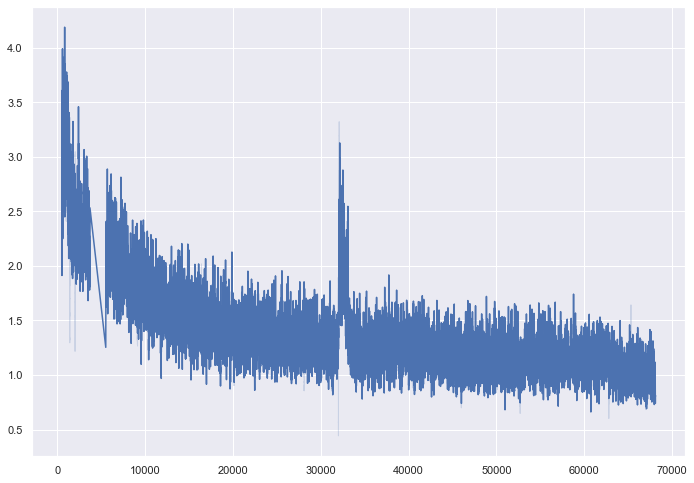

In [9]:
import seaborn as sns

# Plot the result
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(sorted_iteration_list, avg_loss_list)